# <font color=blue>Model Validation in Python</font> 
Time series data is omnipresent in the field of Data Science. Whether it is analyzing business trends, forecasting company revenue or exploring customer behavior, every data scientist is likely to encounter time series data at some point during their work. To get you started on working with time series data, this course will provide practical knowledge on visualizing time series data using Python.

## <font color=red>01 - Introduction</font> 
 You will learn how to leverage basic plottings tools in Python, and how to annotate and personalize your time series plots. By the end of this chapter, you will be able to take any static dataset and produce compelling plots of your data. 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Load your time series data</h1><div class=""><p><p>The most common way to import time series data in Python is by using the <code>pandas</code> library. You can use the <code>read_csv()</code> from <code>pandas</code>  to read the contents of a file into a DataFrame. This can be achieved using the following command:</p>
<pre><code>df = pd.read_csv("name_of_your_file.csv")
</code></pre>
<p>Once your data is loaded into Python, you can display the first rows of your DataFrame by calling the <code>.head(n=5)</code> method, where <code>n=5</code> indicates that you want to print the first five rows of your DataFrame.</p>
<p>In this exercise, you will read in a time series dataset that contains the number of "great" inventions and scientific discoveries from 1860 to 1959, and display its first five rows.</p></div></div>

In [1]:
url_discoveries = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_5226/datasets/ch1_discoveries.csv'

In [2]:
# Import pandas
import pandas as pd

# Read in the file content in a DataFrame called discoveries
discoveries = pd.read_csv(url_discoveries)

# Display the first five lines of the DataFrame
print(discoveries.head())

         date  Y
0  01-01-1860  5
1  01-01-1861  3
2  01-01-1862  0
3  01-01-1863  2
4  01-01-1864  0


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Test whether your data is of the correct type</h1><div class=""><p><p>When working with time series data in <code>pandas</code>, any date information should be formatted as a <code>datetime64</code> type. Therefore, it is important to check that the columns containing the date information are of the correct type. You can check the type of each column in a DataFrame by using the <code>.dtypes</code> attribute. Fortunately, if your date columns come as strings, epochs, etc... you can use the <code>to_datetime()</code> function to convert them to the appropriate <code>datetime64</code> type:</p>
<pre><code>df['date_column'] = pd.to_datetime(df['date_column'])
</code></pre>
<p>In this exercise, you will learn how to check the data type of the columns in your time series data and convert a date column to the appropriate <code>datetime</code> type.</p></div></div>

In [3]:
# Print the data type of each column in discoveries
print(discoveries.dtypes)

date    object
Y        int64
dtype: object


In [4]:
# Convert the date column to a datestamp type
discoveries['date'] = pd.to_datetime(discoveries['date'])

In [5]:
# Print the data type of each column in discoveries, again
print(discoveries.dtypes)

date    datetime64[ns]
Y                int64
dtype: object


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Your first plot!</h1><div class=""><p><p>Let's take everything you have learned so far and plot your first time series plot. You will set the groundwork by producing a time series plot of your data and labeling the axes of your plot, as this makes the plot more readable and interpretable for the intended audience.</p>
<p><code>matplotlib</code> is the most widely used plotting library in Python, and would be the most appropriate tool for this job. Fortunately for us, the <code>pandas</code> library has implemented a <code>.plot()</code> method on Series and DataFrame objects that is a wrapper around <code>matplotlib.pyplot.plot()</code>, which makes it easier to produce plots.</p></div></div>

In [6]:
import matplotlib.pyplot as plt

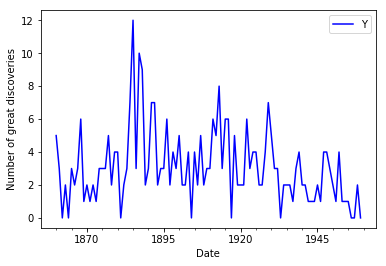

In [7]:
# Set the date column as the index of your DataFrame discoveries
discoveries = discoveries.set_index('date') 

# Plot the time series in your DataFrame
ax = discoveries.plot(color="blue")

# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Number of great discoveries')

# Show plot
plt.show()

It looks like the largest number of great discoveries happened during the year of 1885.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Specify plot styles</h1><div class=""><p><p>The <code>matplotlib</code> library also comes with a number of built-in stylesheets that allow you to customize the appearance of your plots. To use a particular style sheet for your plots, you can use the command <code>plt.style.use(your_stylesheet)</code> where <code>your_stylesheet</code> is the name of the style sheet.</p>
<p>In order to see the list of available style sheets that can be used, you can use the command <code>print(plt.style.available)</code>. For the rest of this course, we will use the awesome <code>fivethirtyeight</code> style sheet.</p></div></div>

In [8]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


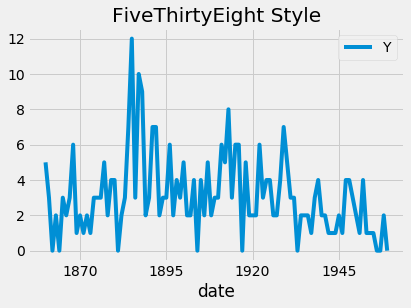

In [9]:
# Import the matplotlib.pyplot sub-module
import matplotlib.pyplot as plt

# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')

# Plot the time series
ax1 = discoveries.plot()
ax1.set_title('FiveThirtyEight Style')
plt.show()

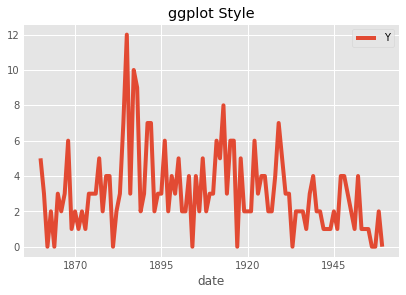

In [10]:
# Import the matplotlib.pyplot sub-module
import matplotlib.pyplot as plt

# Use the ggplot style
plt.style.use('ggplot')
ax2 = discoveries.plot()

# Set the title
ax2.set_title('ggplot Style')
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Display and label plots</h1><div class=""><p><p>As you saw earlier, if the index of a <code>pandas</code> DataFrame consists of dates, then <code>pandas</code> will automatically format the x-axis in a human-readable way. In addition the <code>.plot()</code> method allows you to specify various other parameters to tailor your time series plot (color of the lines, width of the lines and figure size).</p>
<p>You may have noticed the use of the notation <code>ax = df.plot(...)</code> and wondered about the purpose of the <code>ax</code> object. This is because the <code>plot</code> function returns a <code>matplotlib</code> <code>AxesSubplot</code> object, and it is common practice to assign this returned object to a variable called <code>ax</code>. Doing so also allows you to include additional notations and specifications to your plot such as axis labels.</p></div></div>

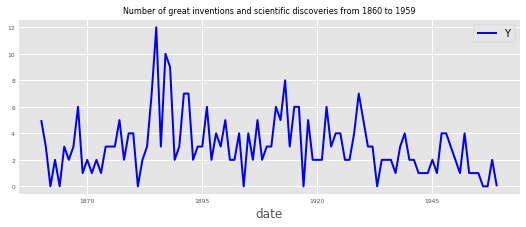

In [11]:
# Plot a line chart of the discoveries DataFrame using the specified arguments
ax = discoveries.plot(color='blue', figsize=(8, 3), linewidth=2, fontsize=6)

# Specify the title in your plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8)

# Show plot
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Subset time series data</h1><div class=""><p><p>When plotting time series data, you may occasionally want to visualize only a subset of the data. The <code>pandas</code> library provides powerful indexing and subsetting methods that allow you to extract specific portions of a DataFrame. For example, you can subset all the data between 1950 and 1960 in the <code>discoveries</code> DataFrame by specifying the following date range:</p>
<pre><code>subset_data = discoveries['1950-01-01':'1960-01-01']
</code></pre>
<p>Note: Subsetting your data this way is only possible if the index of your DataFrame contains dates of the <code>datetime</code> type. Failing that, the <code>pandas</code> library will return an error message.</p></div></div>

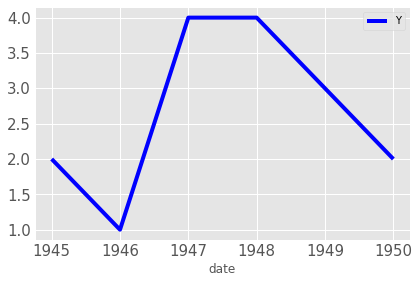

In [12]:
# Select the subset of data between 1945 and 1950
discoveries_subset_1 = discoveries['1945':'1950']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_1.plot(color='blue', fontsize=15)

# Show plot
plt.show()

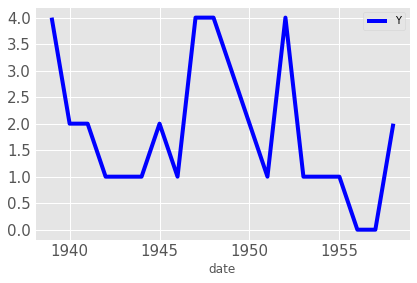

In [13]:
# Select the subset of data between 1939 and 1958
discoveries_subset_2 = discoveries['1939-01-01':'1958-01-01']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_2.plot(color='blue', fontsize=15)

# Show plot
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Add vertical and horizontal markers</h1><div class=""><p><p>Additional annotations can help further emphasize specific observations or events. Here, you will learn how to highlight significant events by adding markers at specific timestamps of your time series plot. The <code>matplotlib</code> library makes it possible to draw vertical and horizontal lines to identify particular dates.</p>
<p>Recall that the index of the <code>discoveries</code> DataFrame are of the <code>datetime</code> type, so the x-axis values of a plot will also contain dates, and it is possible to directly input a date when annotating your plots with vertical lines. For example, a vertical line at January 1, 1945 can be added to your plot by using the command:</p>
<pre><code>ax.axvline('1945-01-01', linestyle='--')
</code></pre></div></div>

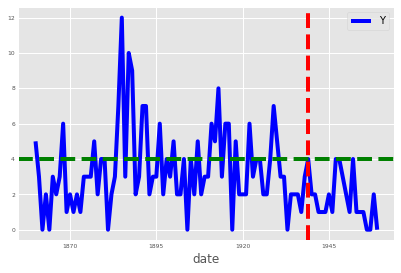

In [14]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a red vertical line
ax.axvline("1939-01-01", color='red', linestyle='--')

# Add a green horizontal line
ax.axhline(4, color='green', linestyle='--')

plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Add shaded regions to your plot</h1><div class=""><p><p>When plotting time series data in Python, it is also possible to highlight complete regions of your time series plot. In order to add a shaded region between January 1, 1936 and January 1, 1950, you can use the command:</p>
<pre><code>ax.axvspan('1936-01-01', '1950-01-01', color='red' , alpha=0.5)
</code></pre>
<p>Here we specified the overall transparency of the region by using the <code>alpha</code> argument (where <code>0</code> is completely transparent and <code>1</code> is full color).</p></div></div>

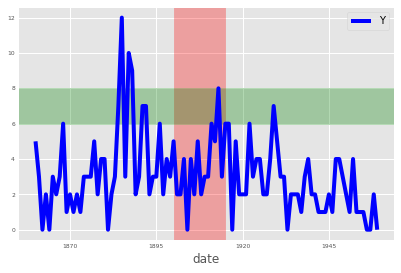

In [15]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a vertical red shaded region
ax.axvspan('1900-01-01', '1915-01-01', color='red', alpha=0.3)

# Add a horizontal green shaded region
ax.axhspan(6, 8, color='green', alpha=0.3)

plt.show()

## <font color=red>02 - Summary Statistics and Diagnostics </font> 
 In this chapter, you will gain a deeper understanding of your time series data by computing summary statistics and plotting aggregated views of your data. 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Find missing values</h1><div class=""><p><p>In the field of Data Science, it is common to encounter datasets with missing values. This is especially true in the case of time series data, where missing values can occur if a measurement fails to record the value at a specific timestamp. To count the number of missing values in a DataFrame called <code>df</code> that contains time series data, you can use the command:</p>
<pre><code>missing_values = df.isnull().sum()
</code></pre>
<p>In this exercise, you will learn how to find whether your data contains any missing values.</p></div></div>

In [16]:
co2_levels = pd.read_csv('./data/co2.txt', index_col=0)
co2_levels.datestamp = pd.to_datetime(co2_levels.datestamp)

In [17]:
# Display first seven rows of co2_levels
print(co2_levels.head(7))

   datestamp    co2
0 1958-03-29  316.1
1 1958-04-05  317.3
2 1958-04-12  317.6
3 1958-04-19  317.5
4 1958-04-26  316.4
5 1958-05-03  316.9
6 1958-05-10    NaN


In [18]:
# Set datestamp column as index
co2_levels = co2_levels.set_index('datestamp')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    59
dtype: int64


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Handle missing values</h1><div class=""><p><p>In order to replace missing values in your time series data, you can use the command:</p>
<pre><code>df = df.fillna(method="ffill")
</code></pre>
<p>where the argument specifies the type of method you want to use. For example, specifying <code>bfill</code> (i.e backfilling) will ensure that missing values are replaced using the next valid observation, while <code>ffill</code> (i.e. forward-filling)  ensures that missing values are replaced using the last valid observation.</p>
<p>Recall from the previous exercise that <code>co2_levels</code> has 59 missing values.</p></div></div>

In [19]:
# Impute missing values with the next valid observation
co2_levels = co2_levels.fillna(method='bfill')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    0
dtype: int64


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Display rolling averages</h1><div class=""><p><p>It is also possible to visualize rolling averages of the values in your time series. This is equivalent to "smoothing" your data, and can be particularly useful when your time series contains a lot of noise or outliers. For a given DataFrame <code>df</code>, you can obtain the rolling average of the time series by using the command:</p>
<pre><code>df_mean = df.rolling(window=12).mean()
</code></pre>
<p>The <code>window</code> parameter should be set according to the granularity of your time series. For example, if your time series contains daily data and you are looking for rolling values over a whole year, you should specify the parameter to <code>window=365</code>. In addition, it is easy to get rolling values for other other metrics, such as the standard deviation (<code>.std()</code>) or variance (<code>.var()</code>).</p></div></div>

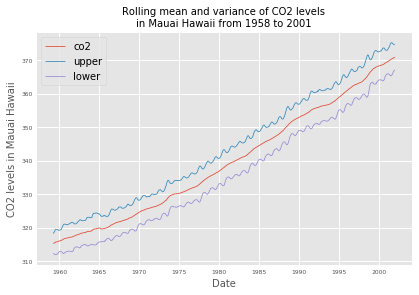

In [20]:
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (2 * mstd['co2'])

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (2 * mstd['co2'])

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Display aggregated values</h1><div class=""><p><p>You may sometimes be required to display your data in a more aggregated form. For example, the <code>co2_levels</code> data contains weekly data, but you may need to display its values aggregated by month of year. In datasets such as the <code>co2_levels</code> DataFrame where the index is a <code>datetime</code> type, you can  extract the year of each dates in the index:</p>
<pre><code># extract of the year in each dates of the df DataFrame
index_year = df.index.year
</code></pre>
<p>To extract the month or day of the dates in the indices of the <code>df</code> DataFrame, you would use <code>df.index.month</code> and <code>df.index.day</code>, respectively.
You can then use the extracted year of each indices in the <code>co2_levels</code> DataFrame and the <code>groupby</code> function to compute the mean CO2 levels by year:</p>
<pre><code>df_by_year = df.groupby(index_year).mean()
</code></pre></div></div>

In [21]:
co2_levels.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Data columns (total 1 columns):
co2    2284 non-null float64
dtypes: float64(1)
memory usage: 35.7 KB


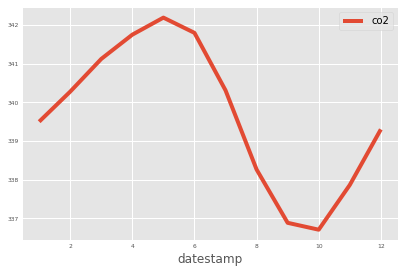

In [22]:
# Get month for each dates in the index of co2_levels
index_month = co2_levels.index.month

# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month = co2_levels.groupby(co2_levels.index.month).mean()

# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize = 6)

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show()

This is pretty cool! By plotting the mean CO2 levels data for each month, you can see how CO2 levels are high during the summer months, and lower during the winter months. This is because of the increased sunlight and CO2 production by plants!

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Compute numerical summaries</h1><div class=""><p><p>You have learnt how to display and annotate time series data in multiple ways, but it is also informative to collect summary statistics of your data. Being able to achieve this task will allow you to share and discuss statistical properties of your data that can further support the plots you generate. In <code>pandas</code>, it is possible to quickly obtain summaries of columns in your DataFrame by using the command:</p>
<pre><code>print(df.describe())
</code></pre>
<p>This will print statistics including the mean, the standard deviation, the minima and maxima and the number of observations for all numeric columns in your <code>pandas</code> DataFrame.</p></div></div>

In [23]:
# Print out summary statistics of the co2_levels DataFrame
print(co2_levels.describe())

# Print out the minima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.min())

# Print out the maxima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.max())

               co2
count  2284.000000
mean    339.657750
std      17.100899
min     313.000000
25%     323.975000
50%     337.700000
75%     354.500000
max     373.900000
313.0
373.9


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Boxplots and Histograms</h1><div class=""><p><p>Boxplots represent a graphical rendition of the minimum, median, quartiles, and maximum of your data. You can generate a boxplot by calling the <code>.boxplot()</code> method on a DataFrame.</p>
<p>Another method to produce visual summaries is by leveraging histograms, which allow you to inspect the data and uncover its underlying distribution, as well as the presence of outliers and overall spread. An example of how to generate a histogram is shown below:</p>
<pre><code>ax = co2_levels.plot(kind='hist', bins=100)
</code></pre>
<p>Here, we used the standard <code>.plot()</code> method but specified the <code>kind</code> argument to be <code>'hist'</code>. In addition, we also added the <code>bins=100</code> parameter, which specifies how many intervals (i.e <code>bins</code>) we should cut our data into.</p></div></div>

No handles with labels found to put in legend.


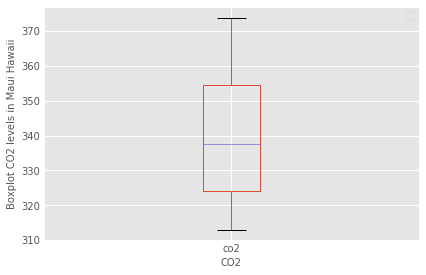

In [24]:
# Generate a boxplot
ax = co2_levels.boxplot()

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

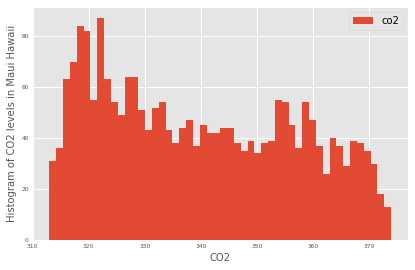

In [25]:
# Generate a histogram
ax = co2_levels.plot(kind='hist', bins=50, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Density plots</h1><div class=""><p><p>In practice, histograms can be a substandard method for assessing the distribution of your data because they can be strongly affected by the number of bins that have been specified. Instead, kernel density plots represent a more effective way to view the distribution of your data. An example of how to generate a density plot of is shown below:</p>
<pre><code>ax = df.plot(kind='density', linewidth=2)
</code></pre>
<p>The standard <code>.plot()</code> method is specified with the <code>kind</code> argument set to <code>'density'</code>. We also specified an additional parameter <code>linewidth</code>, which controls the width of the line to be plotted.</p></div></div>

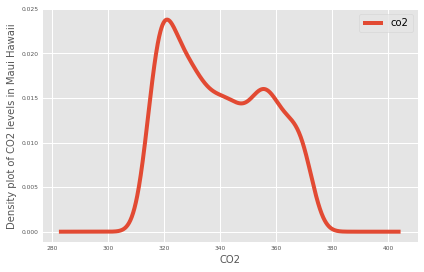

In [26]:
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=4, fontsize=6)

# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)

plt.show()

## <font color=red>03 - Seasonality, Trend and Noise </font> 
 You will go beyond summary statistics by learning about autocorrelation and partial autocorrelation plots. You will also learn how to automatically detect seasonality, trend and noise in your time series data. 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Autocorrelation in time series data</h1><div class=""><p><p>In the field of time series analysis, autocorrelation refers to the correlation of a time series with a lagged version of itself. For example, an autocorrelation of <code>order 3</code> returns the correlation between a time series and its own values lagged by 3 time points.</p>
<p>It is common to use the autocorrelation (ACF) plot, also known as self-autocorrelation, to visualize the autocorrelation of a time-series. The <code>plot_acf()</code> function in the <code>statsmodels</code> library can be used to measure and plot the autocorrelation of a time series.</p></div></div>

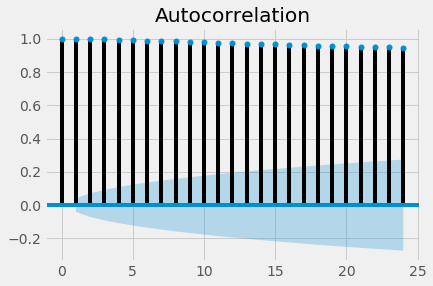

In [27]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

 Autocorrelation plots can be used to quickly discover patterns into your time series, so let's delve a little bit deeper into that

<div class="dc-u-p-24"><h1 class="dc-h3">Interpret autocorrelation plots</h1><div class=""><p><p>If autocorrelation values are close to 0, then values between consecutive observations are not correlated with one another. Inversely, autocorrelations values close to 1 or -1 indicate that there exists strong positive or negative correlations between consecutive observations, respectively.</p>
<p>In order to help you asses how trustworthy these autocorrelation values are, the <code>plot_acf()</code> function also returns confidence intervals (represented as blue shaded regions). If an autocorrelation value goes beyond the confidence interval region, you can assume that the observed autocorrelation value is statistically significant. </p>
<p>In the autocorrelation plot below, are consecutive observations highly correlated (i.e superior to 0.5) and statistically significant?</p>
<p>
  <img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_5226/datasets/ch3_acf.png" width="500">
</p></div></div>


- They are highly correlated but not statistically significant.
- They are not highly correlated but statistically significant.
- They are highly correlated and statistically significant.*
- They are neither highly correlated nor statistically significant.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Partial autocorrelation in time series data</h1><div class=""><p><p>Like autocorrelation, the partial autocorrelation function (PACF) measures the correlation coefficient between a time-series and lagged versions of itself. However, it extends upon this idea by also removing the effect of previous time points. For example, a partial autocorrelation function of <code>order 3</code> returns the correlation between our time series (<code>t_1</code>, <code>t_2</code>, <code>t_3</code>, ...) and its own values lagged by 3 time points (<code>t_4</code>, <code>t_5</code>, <code>t_6</code>, ...), but only after removing all effects attributable to lags 1 and 2.</p>
<p>The <code>plot_pacf()</code> function in the <code>statsmodels</code> library can be used to measure and plot the partial autocorrelation of a time series.</p></div></div>

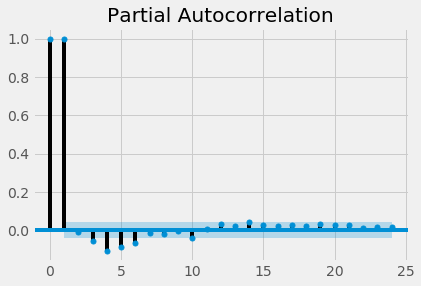

In [28]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

<div class="dc-u-p-24"><h1 class="dc-h3">Interpret partial autocorrelation plots</h1><div class=""><p><p>If partial autocorrelation values are close to 0, then values between observations and lagged observations are not correlated with one another. Inversely, partial autocorrelations with values close to 1 or -1 indicate that there exists strong positive or negative correlations between the lagged observations of the time series.</p>
<p>The <code>.plot_pacf()</code> function also returns confidence intervals, which are represented as blue shaded regions. If partial autocorrelation values are beyond this confidence interval regions, then you can assume that the observed partial autocorrelation values are statistically significant. </p>
<p>In the partial autocorrelation plot below, at which lag values do we have statistically significant partial autocorrelations?</p>
<p>
  <img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_5226/datasets/ch3_pacf.png" width="800">
</p></div></div>

- 0 and 1
- 0, 1 and 10
- 0, 1 and 2
- 0, 1, 4, 5 and 6 *

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Time series decomposition</h1><div class=""><p><p>When visualizing time series data, you should look out for some distinguishable patterns:</p>
<ul>
<li><strong>seasonality</strong>: <em>does the data display a clear periodic pattern?</em></li>
<li><strong>trend</strong>: <em>does the data follow a consistent upwards or downward slope?</em></li>
<li><strong>noise</strong>: <em>are there any outlier points or missing values that are not consistent with the rest of the data?</em></li>
</ul>
<p>You can rely on a method known as time-series decomposition to automatically extract and quantify the structure of time-series data. The <code>statsmodels</code> library provides the <code>seasonal_decompose()</code> function to perform time series decomposition out of the box. </p>
<pre><code>decomposition = sm.tsa.seasonal_decompose(time_series)
</code></pre>
<p>You can extract a specific component, for example seasonality, by accessing the <code>seasonal</code> attribute of the decomposition object.</p></div></div>

In [29]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2_levels)

# Print the seasonality component
print(decomposition.seasonal[0:5])

                 co2
datestamp           
1958-03-29  1.028042
1958-04-05  1.235242
1958-04-12  1.412344
1958-04-19  1.701186
1958-04-26  1.950694


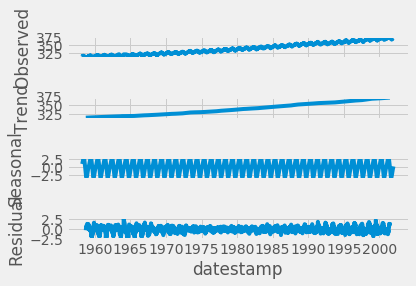

In [30]:
ax = decomposition.plot()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Plot individual components</h1><div class=""><p><p>It is also possible to extract other inferred quantities from your time-series decomposition object. The following code shows you how to extract the observed, trend and noise (or residual, <code>resid</code>) components. </p>
<pre><code>observed = decomposition.observed
trend = decomposition.trend
residuals = decomposition.resid
</code></pre>
<p>You can then use the extracted components and plot them individually. </p>
<p>The <code>decomposition</code> object you created in the last exercise is available in your workspace.</p></div></div>

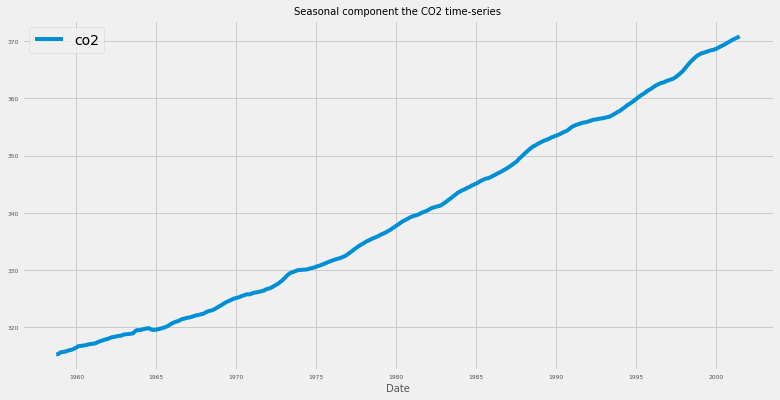

In [31]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

In [32]:
airline = pd.read_csv('./data/airline.csv')
airline['Month'] = pd.to_datetime(airline['Month'])
airline = airline.set_index('Month')

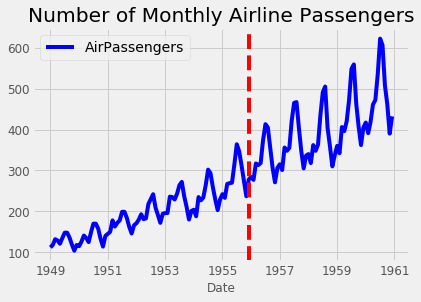

In [33]:
# Plot the time series in your dataframe
ax = airline.plot(color = 'blue', fontsize=12)

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers')
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Analyze the airline dataset</h1><div class=""><p><p>In Chapter 2 you learned: </p>
<ul>
<li>How to check for the presence of missing values, and how to collect summary statistics of time series data contained in a <code>pandas</code> DataFrame.</li>
<li>To generate boxplots of your data to quickly gain insight in your data. </li>
<li>Display <em>aggregate</em> statistics of your data using <code>groupby()</code>. </li>
</ul>
<p>In this exercise, you will apply all these concepts on the <code>airline</code> DataFrame.</p></div></div>

In [34]:
# Print out the number of missing values
print(airline.isnull().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())

AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


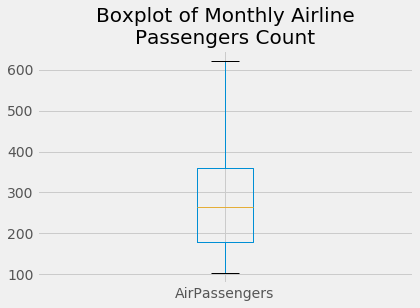

In [35]:
# Display boxplot of airline values
ax = airline.boxplot()

# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()

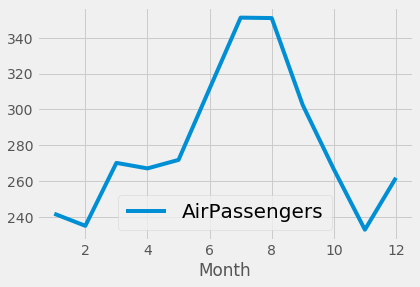

In [36]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(airline.index.month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Time series decomposition of the airline dataset</h1><div class=""><p><p>In this exercise, you will apply time series decomposition to the <code>airline</code> dataset, and visualize the <code>trend</code> and <code>seasonal</code> componenets.</p></div></div>

In [37]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

In [38]:
airline_decomposed = pd.concat((trend, seasonal), axis=1)
airline_decomposed.columns = ['trend', 'seasonal']

            trend   seasonal
Month                       
1949-01-01    NaN -24.748737
1949-02-01    NaN -36.188131
1949-03-01    NaN  -2.241162
1949-04-01    NaN  -8.036616
1949-05-01    NaN  -4.506313


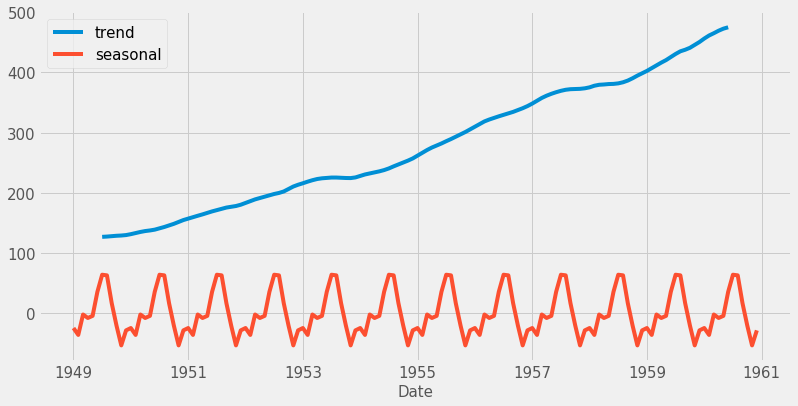

In [39]:
# Print the first 5 rows of airline_decomposed
print(airline_decomposed.head())

# Plot the values of the df_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()

## <font color=red>04 - Work with Multiple Time Series </font> 
 In the field of Data Science, it is common to be involved in projects where multiple time series need to be studied simultaneously. In this chapter, we will show you how to plot multiple time series at once, and how to discover and describe relationships between multiple time series. 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Load multiple time series</h1><div class=""><p><p>Whether it is during personal projects or your day-to-day work as a Data Scientist, it is likely that you will encounter situations that require the analysis and visualization of multiple time series at the same time.</p>
<p>Provided that the data for each time series is stored in distinct columns of a file, the <code>pandas</code> library makes it easy to work with multiple time series. In the following exercises, you will work with a new time series dataset that contains the amount of different types of meat produced in the USA between 1944 and 2012.</p></div></div>

In [40]:
co2_levels

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
1958-05-03,316.9
1958-05-10,317.5
1958-05-17,317.5
1958-05-24,317.9


In [41]:
url_meat = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_5226/datasets/ch4_meat.csv'

In [42]:
# Read in meat DataFrame
meat = pd.read_csv(url_meat)

# Review the first five lines of the meat DataFrame
print(meat.head(5))

# Convert the date column to a datestamp type
meat['date'] = pd.to_datetime(meat['date'])

# Set the date column as the index of your DataFrame meat
meat = meat.set_index('date')

# Print the summary statistics of the DataFrame
print(meat.describe())

         date   beef   veal    pork  lamb_and_mutton  broilers  other_chicken  \
0  1944-01-01  751.0   85.0  1280.0             89.0       NaN            NaN   
1  1944-02-01  713.0   77.0  1169.0             72.0       NaN            NaN   
2  1944-03-01  741.0   90.0  1128.0             75.0       NaN            NaN   
3  1944-04-01  650.0   89.0   978.0             66.0       NaN            NaN   
4  1944-05-01  681.0  106.0  1029.0             78.0       NaN            NaN   

   turkey  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
              beef        veal         pork  lamb_and_mutton     broilers  \
count   827.000000  827.000000   827.000000       827.000000   635.000000   
mean   1683.463362   54.198549  1211.683797        38.360701  1516.582520   
std     501.698480   39.062804   371.311802        19.624340   963.012101   
min     366.000000    8.800000   124.000000        10.900000   250.900000   
25%    1231.500000   24.000000   934.500000        23.00

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Visualize multiple time series</h1><div class=""><p><p>If there are multiple time series in a single DataFrame, you can still use the <code>.plot()</code> method to plot a line chart of all the time series. Another interesting way to plot these is to use area charts. Area charts are commonly used when dealing with multiple time series, and can be used to display cumulated totals.</p>
<p>With the <code>pandas</code> library, you can simply leverage the <code>.plot.area()</code> method to produce area charts of the time series data in your DataFrame.</p></div></div>

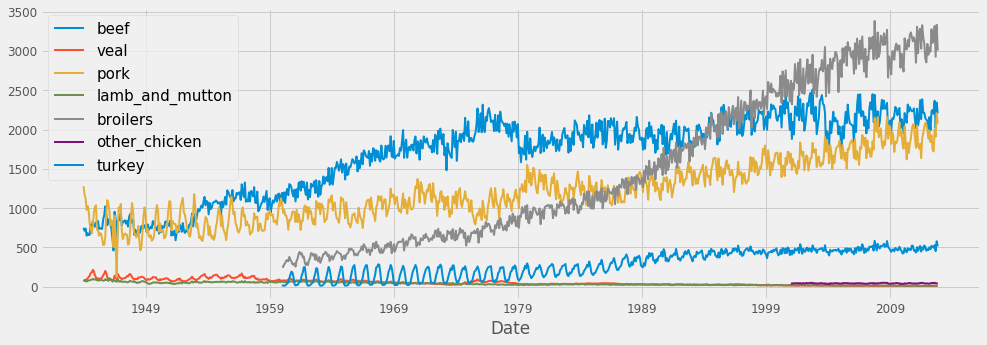

In [43]:
# Plot time series dataset
ax = meat.plot(linewidth=2, fontsize = 12, figsize=(15,5))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

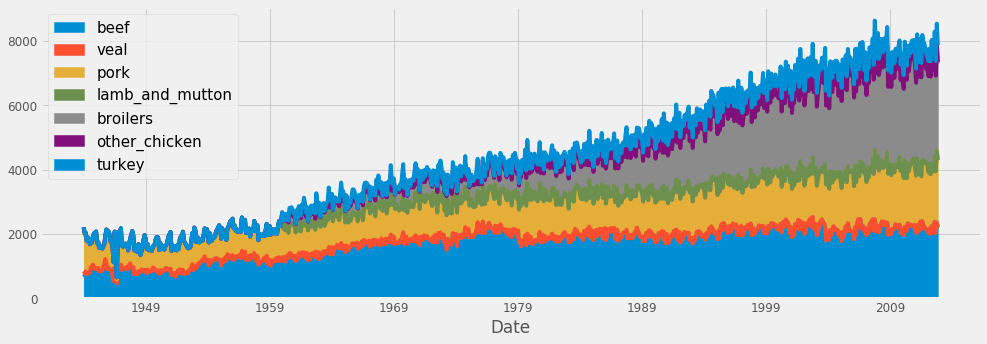

In [44]:
# Plot an area chart
ax = meat.plot.area(fontsize=12, figsize=(15,5))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Define the color palette of your plots</h1><div class=""><p><p>When visualizing multiple time series, it can be difficult to differentiate between various colors in the default color scheme.</p>
<p>To remedy this, you can define each color manually, but this may be time-consuming. Fortunately, it is possible to leverage the <code>colormap</code> argument to <code>.plot()</code> to automatically assign specific color palettes with varying contrasts. You can either provide a <code>matplotlib colormap</code> as an input to this parameter, or provide one of the default strings that is available in the <code>colormap()</code> function available in <code>matplotlib</code> (all of which are available <a href="http://matplotlib.org/examples/color/colormaps_reference.html" target="_blank" rel="noopener noreferrer">here</a>).</p>
<p>For example, you can specify the <code>'viridis'</code> colormap using the following command:</p>
<pre><code>df.plot(colormap='viridis')
</code></pre></div></div>

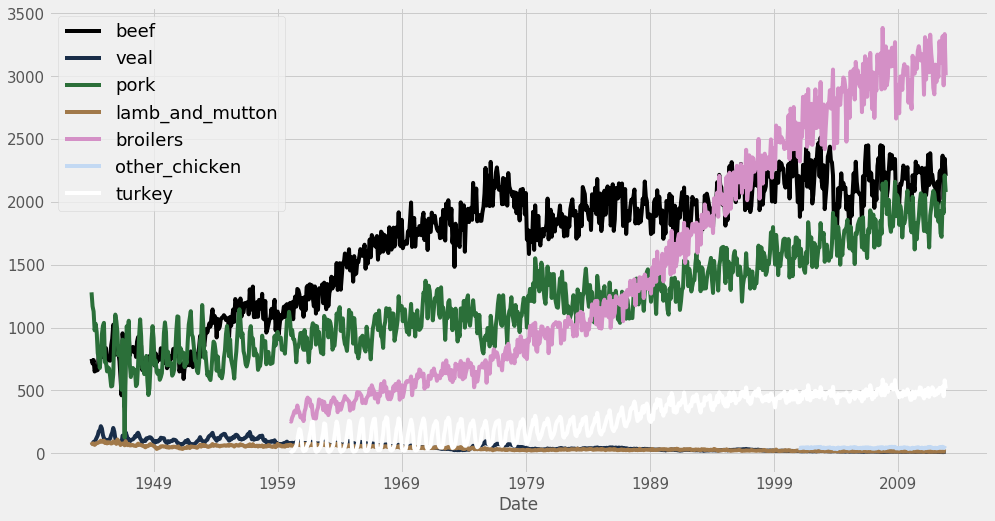

In [45]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='cubehelix', fontsize=15, figsize = (15,8))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()

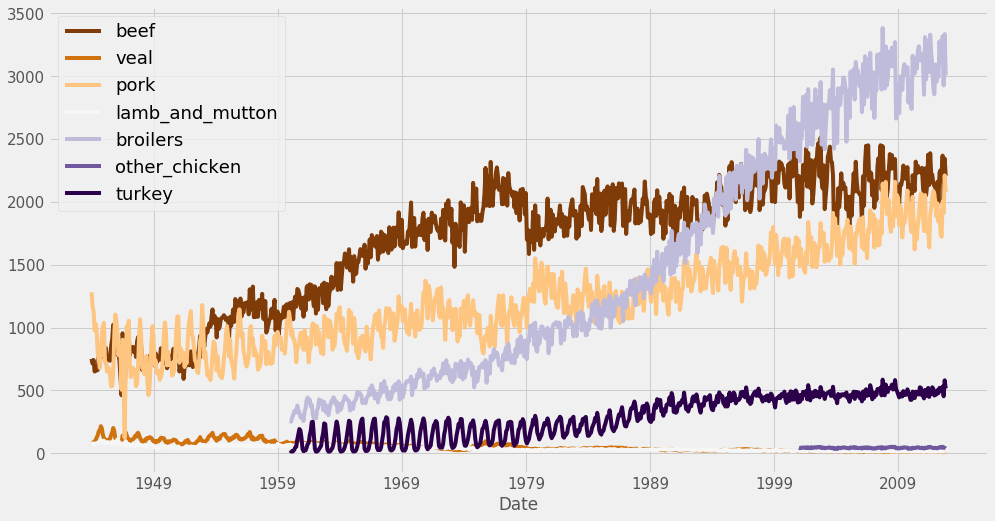

In [46]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='PuOr', fontsize=15, figsize = (15,8))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Add summary statistics to your time series plot</h1><div class=""><p><p>It is possible to visualize time series plots and numerical summaries on one single graph by using the <code>pandas</code> API to <code>matplotlib</code> along with the <code>table</code> method:</p>
<pre><code># Plot the time series data in the DataFrame
ax = df.plot()

 # Compute summary statistics of the df DataFrame
df_summary = df.describe()

# Add summary table information to the plot
ax.table(cellText=df_summary.values, 
         colWidths=[0.3]*len(df.columns), 
         rowLabels=df_summary.index, 
         colLabels=df_summary.columns, 
         loc='top')
</code></pre></div></div>

In [47]:
meat_mean = meat.mean()
cols = list(meat_mean.index)
means = list(meat_mean)
meat_mean = pd.DataFrame(means, cols, columns=['mean']).T

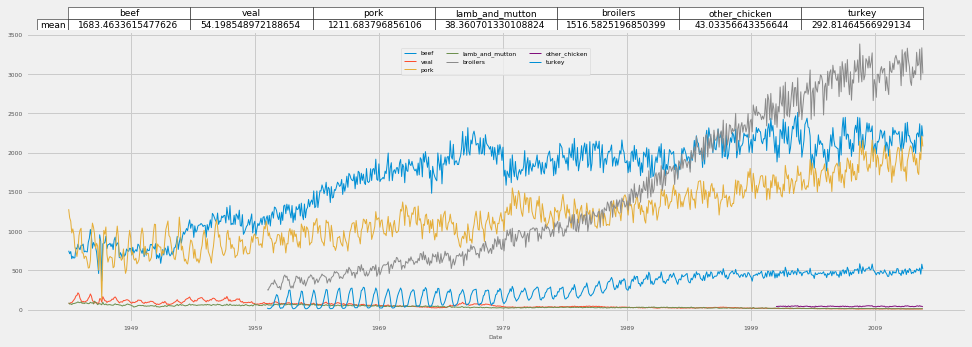

In [48]:
# Plot the meat data
ax = meat.plot(fontsize=6, linewidth=1, figsize=(15,5))

# Add x-axis labels
ax.set_xlabel('Date', fontsize=6)

# Add summary table information to the plot
ax.table(cellText=meat_mean.values,
         colWidths = [0.13]*len(meat_mean.columns),
         rowLabels=meat_mean.index,
         colLabels=meat_mean.columns,
         loc='top')

# Specify the fontsize and location of your legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=6)

# Show plot
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Plot your time series on individual plots</h1><div class=""><p><p>It can be beneficial to plot individual time series on separate graphs as this may improve clarity and provide more context around each time series in your DataFrame.</p>
<p>It is possible to create a "grid" of individual graphs by "faceting" each time series by setting the <code>subplots</code> argument to <code>True</code>. In addition, the arguments that can be added are:</p>
<ul>
<li><code>layout</code>: specifies the number of <code>rows x columns</code> to use. </li>
<li><code>sharex</code> and <code>sharey</code>: specifies whether the x-axis and y-axis values should be shared between your plots.</li>
</ul></div></div>

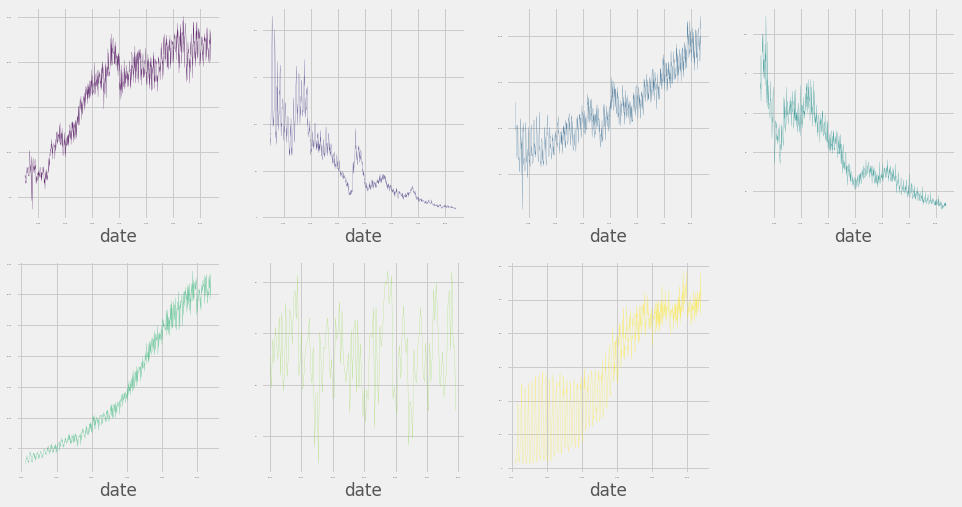

In [49]:
# Create a facetted graph with 2 rows and 4 columns
meat.plot(subplots=True, 
          layout=(2,4), 
          sharex=False, 
          sharey=False, 
          colormap='viridis', 
          fontsize=2, 
          legend=False, 
          linewidth=0.2,
          figsize = (15,8))

plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Compute correlations between time series</h1><div class=""><p><p>The correlation coefficient can be used to determine how multiple variables (or a group of time series) are associated with one another. The result is a correlation matrix that describes the correlation between time series. Note that the diagonal values in a correlation matrix will always be 1, since a time series will always be perfectly correlated with itself.</p>
<p>Correlation coefficients can be computed with the pearson, kendall and spearman methods. A full discussion of these different methods is outside the scope of this course, but the pearson method should be used when relationships between your variables are thought to be linear, while the kendall and spearman methods should be used when relationships between your variables are thought to be non-linear.</p></div></div>

In [50]:
# Compute the correlation between the beef and pork columns using the spearman method
print(meat[['beef', 'pork']].corr(method='spearman'))

# Print the correlation between beef and pork columns
print(0.827587)

          beef      pork
beef  1.000000  0.827587
pork  0.827587  1.000000
0.827587


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Visualize correlation matrices</h1><div class=""><p><p>The correlation matrix generated in the previous exercise can be plotted using a heatmap. To do so, you can leverage the <code>heatmap()</code> function from the <code>seaborn</code> library which contains several arguments to tailor the look of your heatmap.</p>
<pre><code>df_corr = df.corr()

sns.heatmap(df_corr)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
</code></pre>
<p>You can use the <code>.xticks()</code> and <code>.yticks()</code> methods to rotate the axis labels so they don't overlap. </p>
<p>To learn about the arguments to the <code>heatmap()</code> function, refer to this <a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html" target="_blank" rel="noopener noreferrer">page</a>.</p></div></div>

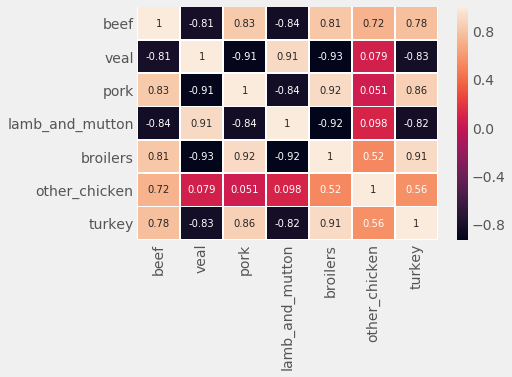

In [51]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='spearman')

# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Clustered heatmaps</h1><div class=""><p><p>Heatmaps are extremely useful to visualize a correlation matrix, but clustermaps are better. A Clustermap allows to uncover structure in a correlation matrix by producing a hierarchically-clustered heatmap:</p>
<pre><code>df_corr = df.corr()

fig = sns.clustermap(df_corr)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
</code></pre>
<p>To prevent overlapping of axis labels, you can reference the <code>Axes</code> from the underlying <code>fig</code> object and specify the rotation. You can learn about the arguments to the <code>clustermap()</code> function <a href="https://seaborn.pydata.org/generated/seaborn.clustermap.html" target="_blank" rel="noopener noreferrer">here</a>.</p></div></div>

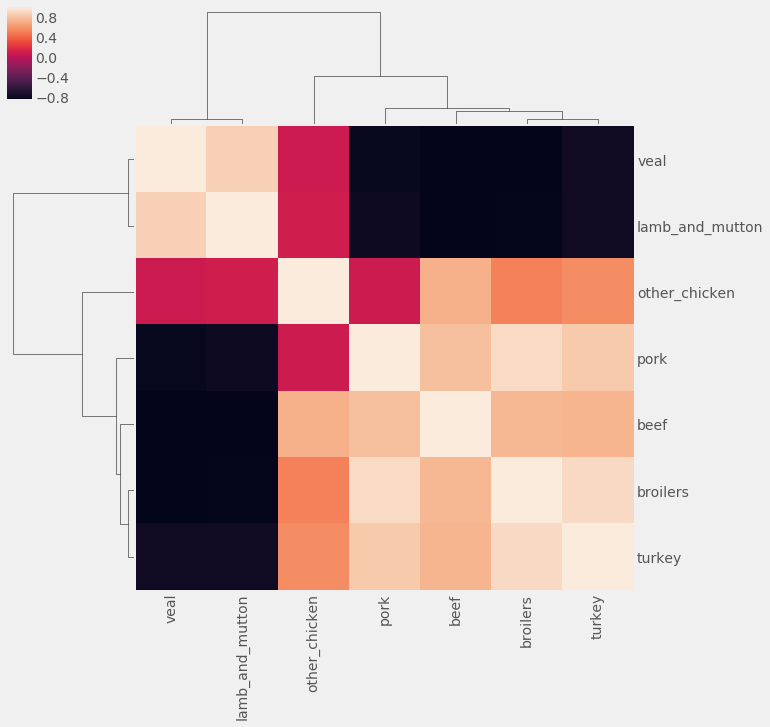

In [52]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

## <font color=red>05 - Case Study </font> 
 This chapter will give you a chance to practice all the concepts covered in the course. You will visualize the unemployment rate in the US from 2000 to 2010. 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Explore the Jobs dataset</h1><div class=""><p><p>In this exercise, you will explore the new <code>jobs</code> DataFrame, which contains the unemployment rate of different industries in the USA during the years of 2000-2010. As you will see, the dataset contains time series for 16 industries and across 122 timepoints (one per month for 10 years). In general, the typical workflow of a Data Science project will involve data cleaning and exploration, so we will begin by reading in the data and checking for missing values.</p></div></div>

In [53]:
url_jobs = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_5226/datasets/ch5_employment.csv'

In [54]:
# Read in jobs file
jobs = pd.read_csv(url_jobs)

# Review the first five lines of your DataFrame
print(jobs.head(5))

# Review the type of each column in your DataFrame
print(jobs.dtypes)

# Convert datestamp column to a datetime object
jobs['datestamp'] = pd.to_datetime(jobs['datestamp'])

# Set the datestamp columns as the index of your DataFrame
jobs = jobs.set_index('datestamp')

# Check the number of missing values in each column
print(jobs.isnull().sum())

    datestamp  Agriculture  Business services  Construction  \
0  2000-01-01         10.3                5.7           9.7   
1  2000-02-01         11.5                5.2          10.6   
2  2000-03-01         10.4                5.4           8.7   
3  2000-04-01          8.9                4.5           5.8   
4  2000-05-01          5.1                4.7           5.0   

   Durable goods manufacturing  Education and Health  Finance  Government  \
0                          3.2                   2.3      2.7         2.1   
1                          2.9                   2.2      2.8         2.0   
2                          2.8                   2.5      2.6         1.5   
3                          3.4                   2.1      2.3         1.3   
4                          3.4                   2.7      2.2         1.9   

   Information  Leisure and hospitality  Manufacturing  Mining and Extraction  \
0          3.4                      7.5            3.6                    3.9

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Describe time series data with boxplots</h1><div class=""><p><p>You should always explore the distribution of the variables, and because you are working with time series, you will explore their properties using boxplots and numerical summaries. As a reminder, you can plot data in a DataFrame as boxplots with the command:</p>
<pre><code>df.boxplot(fontsize=6, vert=False)
</code></pre>
<p>Notice the introduction of the new parameter <code>vert</code>, which specifies whether to plot the boxplots horizontally or vertically.</p></div></div>

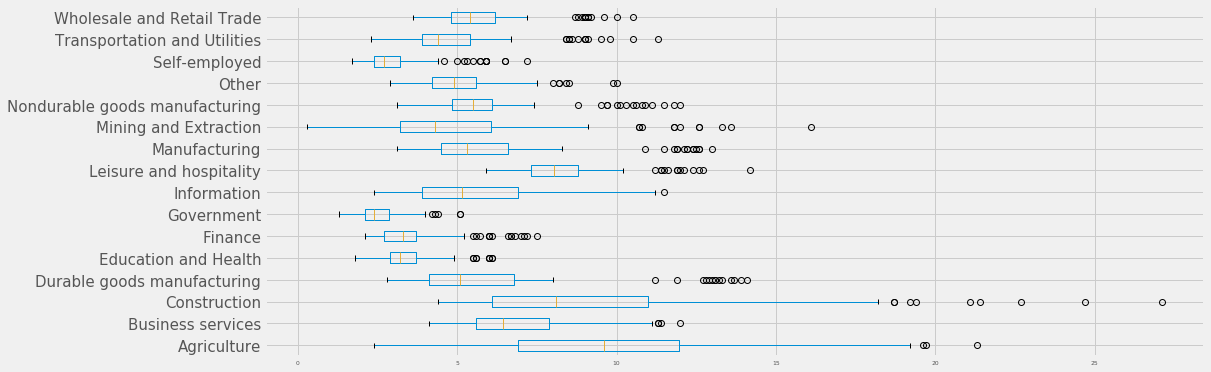

       Agriculture  Business services  Construction  \
count   122.000000         122.000000    122.000000   
mean      9.840984           6.919672      9.426230   
std       3.962067           1.862534      4.587619   
min       2.400000           4.100000      4.400000   
25%       6.900000           5.600000      6.100000   
50%       9.600000           6.450000      8.100000   
75%      11.950000           7.875000     10.975000   
max      21.300000          12.000000     27.100000   

       Durable goods manufacturing  Education and Health     Finance  \
count                   122.000000            122.000000  122.000000   
mean                      6.025410              3.420492    3.540164   
std                       2.854475              0.877538    1.235405   
min                       2.800000              1.800000    2.100000   
25%                       4.125000              2.900000    2.700000   
50%                       5.100000              3.200000    3.300000   


In [55]:
# Generate a boxplot
jobs.boxplot(fontsize=6, vert=False,  figsize=(15, 6))
plt.yticks(fontsize = 15)
plt.show()

# Generate numerical summaries
print(jobs.describe())

# Print the name of the time series with the highest mean
print('Agriculture')

# Print the name of the time series with the highest variability
print('Construction')

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Plot all the time series in your dataset</h1><div class=""><p><p>The <code>jobs</code> DataFrame contains 16 time series representing the unemployment rate of various industries between 2001 and 2010. This may seem like a large amount of time series to visualize at the same time, but Chapter 4 introduced you to facetted plots. In this exercise, you will explore some of the time series in the <code>jobs</code> DataFrame and look to extract some meaningful information from these plots.</p></div></div>

            Finance  Information  Manufacturing  Construction
datestamp                                                    
2000-01-01      2.7          3.4            3.6           9.7
2000-02-01      2.8          2.9            3.4          10.6
2000-03-01      2.6          3.6            3.6           8.7
2000-04-01      2.3          2.4            3.7           5.8
2000-05-01      2.2          3.5            3.4           5.0


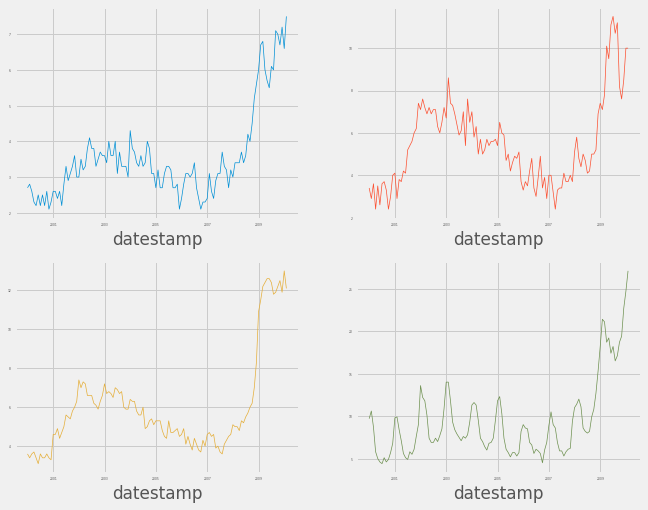

In [56]:
# A subset of the jobs DataFrame
jobs_subset = jobs[['Finance', 'Information', 'Manufacturing', 'Construction']]

# Print the first 5 rows of jobs_subset
print(jobs_subset.head())

# Create a facetted graph with 2 rows and 2 columns
ax = jobs_subset.plot(subplots=True,
                      layout=(2,2),
                      sharex=False,
                      sharey=False,
                      linewidth=0.7,
                      fontsize=3,
                      legend=False,
                      figsize = (10,8))

plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Annotate significant events in time series data</h1><div class=""><p><p>When plotting the <code>Finance</code>, <code>Information</code>, <code>Manufacturing</code> and <code>Construction</code> time series of the <code>jobs</code> DataFrame, you observed a distinct increase in unemployment rates during 2001 and 2008. In general, time series plots can be made even more informative if you include additional annotations that emphasize specific observations or events. This allows you to quickly highlight parts of the graph to viewers, and can help infer what may have caused a specific event.</p>
<p>Recall that you have already set the <code>datestamp</code> column as the index of the <code>jobs</code> DataFrame, so you are prepared to directly annotate your plots with vertical or horizontal lines.</p></div></div>

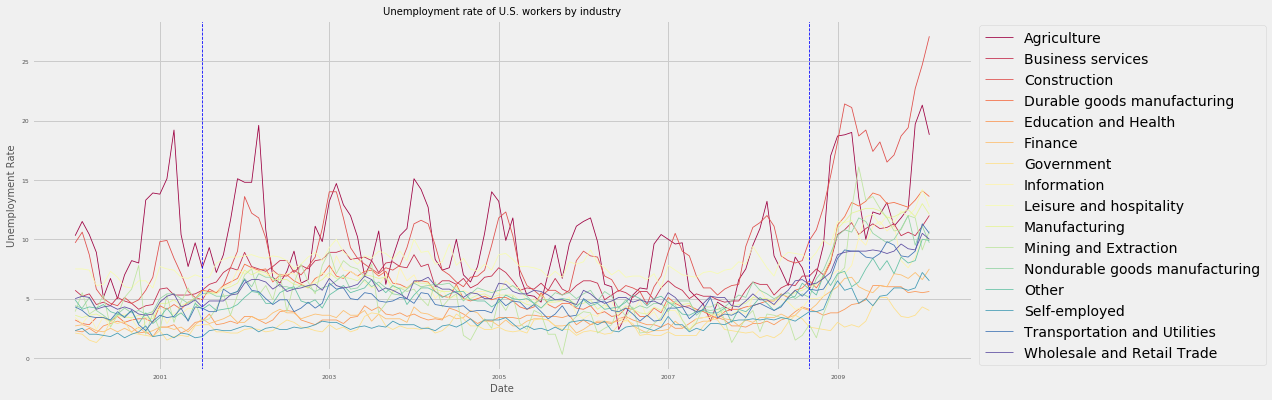

In [57]:
# Plot all time series in the jobs DataFrame
ax = jobs.plot(colormap='Spectral', fontsize=6, linewidth=0.8, figsize=(15,6))

# Set labels and legend
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Unemployment Rate', fontsize=10)
ax.set_title('Unemployment rate of U.S. workers by industry', fontsize=10)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Annotate your plots with vertical lines
ax.axvline('2001-07-01', color='blue', linestyle='--', linewidth=0.8)
ax.axvline('2008-09-01', color='blue', linestyle='--', linewidth=0.8)

# Show plot
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Plot monthly and yearly trends</h1><div class=""><p><p>Like we saw in Chapter 2, when the index of a DataFrame is of the <code>datetime</code> type, it is possible to directly extract the day, month or year of each date in the index. As a reminder, you can extract the year of each date in the index using the <code>.index.year</code> attribute. You can then use the <code>.groupby()</code> and <code>.mean()</code> methods to compute the mean annual value of each time series in your DataFrame:</p>
<pre><code>index_year = df.index.year
df_by_year = df.groupby(index_year).mean()
</code></pre>
<p>You will now apply what you have learned to display the aggregate mean values of each time series in the <code>jobs</code> DataFrame.</p></div></div>

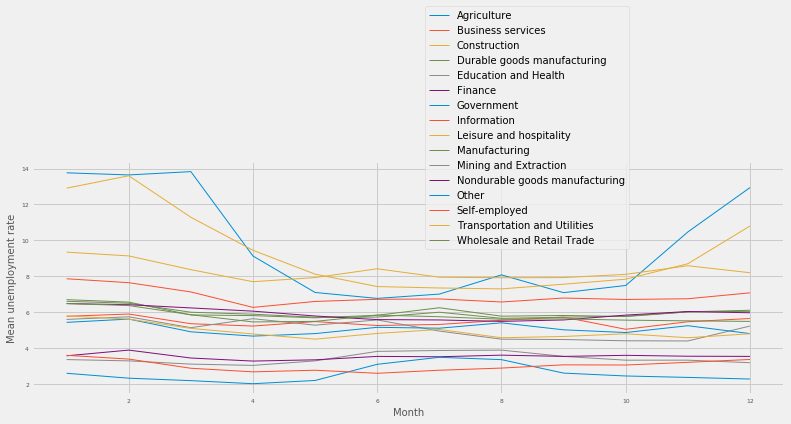

In [58]:
# Extract the month from the index of jobs
index_month = jobs.index.month

# Compute the mean unemployment rate for each month
jobs_by_month = jobs.groupby(index_month).mean()

# Plot the mean unemployment rate for each month
ax = jobs_by_month.plot(fontsize=6, linewidth=1,figsize=(12,4))

# Set axis labels and legend
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize=10)
plt.show()

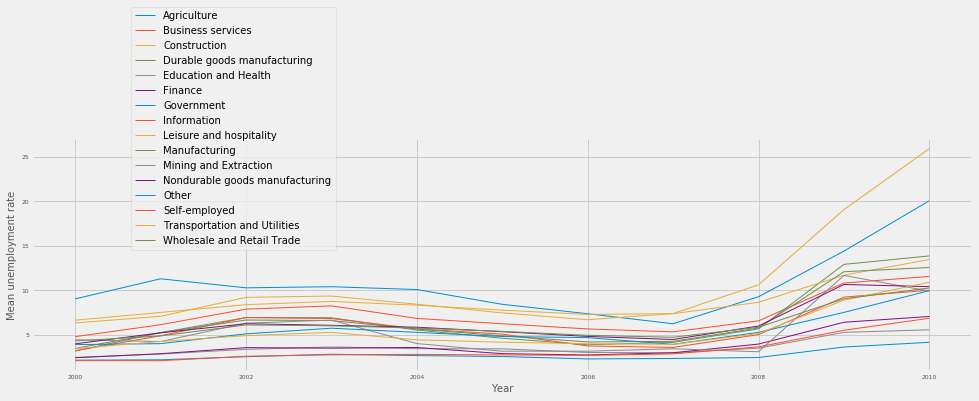

In [59]:
# Extract of the year in each date indices of the jobs DataFrame
index_year = jobs.index.year

# Compute the mean unemployment rate for each year
jobs_by_year = jobs.groupby(index_year).mean()

# Plot the mean unemployment rate for each year
ax = jobs_by_year.plot(fontsize=6, linewidth=1, figsize=(15,4))

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10)
plt.show()

Averaging time series values by month shows that unemployment rate tends to be a lot higher during the winter months for the Agriculture and Construction industry. The increase in unemployment rate after 2008 is very clear when average time series values by year.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Apply time series decomposition to your dataset</h1><div class=""><p><p>You will now perform time series decomposition on multiple time series. You can achieve this by leveraging the Python <code>dict</code>ionary to store the results of each time series decomposition.</p>
<p>In this exercise, you will initialize an empty dictionary with a set of curly braces, <code>{}</code>, use a <code>for</code> loop to iterate through the columns of the DataFrame and apply time series decomposition to each time series. After each time series decomposition, you place the results in the dictionary by using the command <code>my_dict[key] = value</code>, where <code>my_dict</code> is your dictionary, <code>key</code> is the name of the column/time series, and <code>value</code> is the decomposition object of that time series.</p></div></div>

In [60]:
# Initialize dictionary
jobs_decomp = {}

# Get the names of each time series in the DataFrame
jobs_names = jobs.columns

# Run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    jobs_decomp[ts] = ts_decomposition

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Visualize the seasonality of multiple time series</h1><div class=""><p><p>You will now extract the <code>seasonality</code> component of <code>jobs_decomp</code> to visualize the seasonality in these time series. Note that before plotting, you will have to convert the dictionary of <code>seasonality</code> components into a DataFrame using the <code>pd.DataFrame.from_dict()</code> function.  </p>
<p>An empty dictionary <code>jobs_seasonal</code> and the time series decompisiton object <code>jobs_decomp</code> from the previous exercise are available in your workspace.</p></div></div>

In [61]:
jobs_seasonal = {}

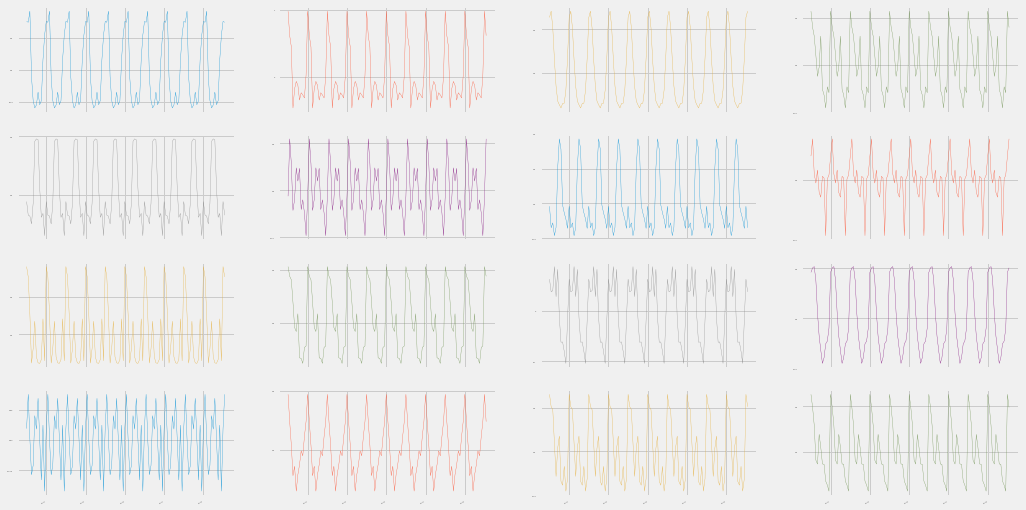

In [62]:
# Extract the seasonal values for the decomposition of each time series
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal
    
# Create a DataFrame from the jobs_seasonal dictionnary
seasonality_df = pd.DataFrame.from_dict(jobs_seasonal)

# Remove the label for the index
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(subplots=True,
                   layout=(4,4),
                   sharey=False,
                   fontsize=2,
                   linewidth=0.3,
                   legend=False,
                   figsize = (16,10))

# Show plot
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Correlations between multiple time series</h1><div class=""><p><p>In the previous exercise, you extracted the <code>seasonal</code> component of each time series in the <code>jobs</code> DataFrame and stored those results in new DataFrame called <code>seasonality_df</code>. In the context of jobs data, it can be interesting to compare seasonality behavior, as this may help uncover which job industries are the most similar or the most different.</p>
<p>This can be achieved by using the <code>seasonality_df</code> DataFrame and computing the correlation between each time series in the dataset. In this exercise, you will leverage what you have learned in Chapter 4 to compute and create a clustermap visualization of the correlations between time series in the <code>seasonality_df</code> DataFrame.</p></div></div>

In [63]:
seasonality_df.head()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
2000-01-01,3.748816,0.981096,3.184209,0.567948,-0.060934,-0.024861,-0.040779,0.195768,0.905135,0.527751,0.626319,0.460610,0.094796,0.470752,0.652473,0.630714
2000-02-01,3.687704,0.614429,3.545320,0.396651,-0.178063,0.218657,-0.349113,0.337897,0.768098,0.437010,0.375856,0.505517,0.378129,0.239734,0.511269,0.487195
2000-03-01,4.546038,0.443596,2.579117,0.304522,-0.185934,0.113102,-0.279205,0.046694,0.270413,0.403214,0.399931,0.518017,0.008684,0.038345,0.478399,0.288121
2000-04-01,-0.540536,-0.471682,0.735135,0.103133,-0.253063,-0.085509,-0.462539,-0.027843,-0.382365,0.190714,0.874468,0.379591,-0.287149,-0.219063,0.092751,-0.095212
2000-05-01,-2.388221,-0.184645,-0.781069,-0.118164,-0.075285,-0.038287,-0.343094,0.079564,-0.190235,-0.046786,0.280949,0.053665,-0.210297,-0.138970,-0.285027,-0.137342


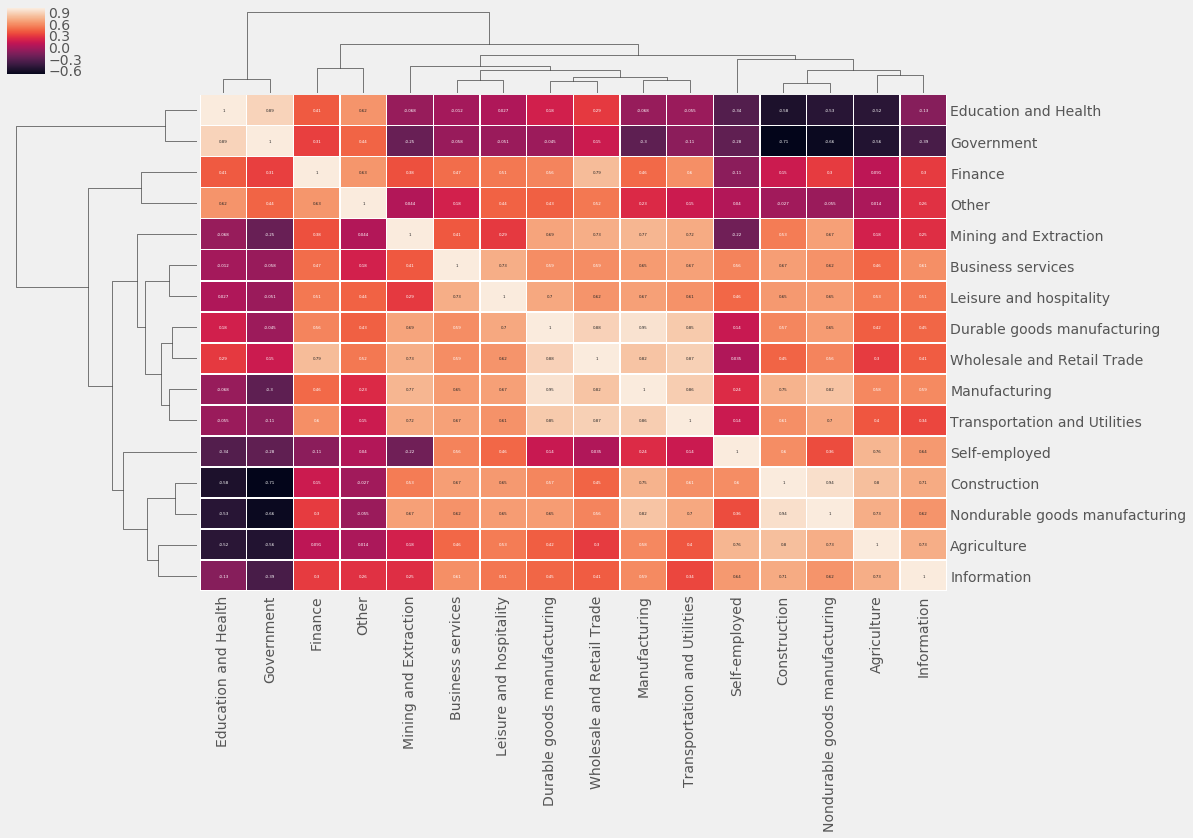

0.8887968296115875


In [64]:
# Get correlation matrix of the seasonality_df DataFrame
seasonality_corr = seasonality_df.corr(method=('spearman'))

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 4}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()

# Print the correlation between the seasonalities of the Government and Education & Health industries
print(seasonality_corr.loc['Government','Education and Health'])

<div class="dc-u-p-24"><h1 class="dc-h3">Interpret correlations</h1><div class=""><p><p>The time series in the <code>jobs</code> DataFrame contain multiple time series with very different seasonalities. Using the clustermap of the correlation plots that you generated in the previous exercise, can you identify and discuss which time series is the most correlated to the <code>Self-Employed</code> job?</p>
<p>
  <img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_5226/datasets/ch5_ex13.png" width="1000">
</p></div></div>